# Data visualization

In [6]:
import pandas as pd
df = pd.read_csv('/content/apartments.tsv', sep='\t',names=["Гарчиг", "Үнэ", "Байршил", "Хэмжээ", "Давхар", "Он", "Дүүрэг", "Лизинг", "Бэлэн", "Үнэмк"])

In [7]:
print(df.head())

                                              Гарчиг          Үнэ  \
0  Худ, 120 мянгат,наадам центрийн урд цэнгэлдэх ...  340000000.0   
1        10 хороололд угсармал5н давхарт 2 өрөө байp  130000000.0   
2           Баянбүрд рэсиденс хотхонд 51.35м2 2 өрөө  148915000.0   
3                              Цагаан хуаранд 2 өрөө   97000000.0   
4                          Буянт ухаа 2-д 2өрөө байр  115000000.0   

         Байршил    Хэмжээ  Давхар    Он     Дүүрэг            Лизинг  \
0     120 мянгат   50.0 м²      10  2020    Хан-Уул         Лизинггүй   
1  10-р хороолол   56.0 м²       4  1994    Баянгол  Банкны лизингтэй   
2       Баянбүрд  51.35 м²      16  2023  Чингэлтэй         Лизинггүй   
3  14-р хороолол   36.2 м²      12  2015   Баянзүрх         Лизинггүй   
4          Нисэх  49.29 м²       9  2017    Хан-Уул         Лизинггүй   

              Бэлэн         Үнэмк  
0  Ашиглалтад орсон  6.800000e+06  
1  Ашиглалтад орсон  2.321429e+06  
2  Ашиглалтад орсон  2.900000e+06  
3 

In [8]:
avg_prices = df.groupby(['Дүүрэг', 'Бэлэн'])['Үнэмк'].mean().reset_index()
avg_prices = avg_prices.rename(columns={'Үнэмк': 'Average Price'})
print(avg_prices)

             Дүүрэг               Бэлэн  Average Price
0          Багануур    Ашиглалтад орсон   1.450000e+06
1           Баянгол  Ашиглалтад ороогүй   2.660597e+06
2           Баянгол    Ашиглалтад орсон   3.004987e+06
3          Баянзүрх  Ашиглалтад ороогүй   2.718474e+06
4          Баянзүрх    Ашиглалтад орсон   3.001303e+06
5            Налайх  Ашиглалтад ороогүй   2.702703e+06
6            Налайх    Ашиглалтад орсон   2.030144e+06
7        Орон нутаг  Ашиглалтад ороогүй   1.350000e+06
8        Орон нутаг    Ашиглалтад орсон   2.258800e+06
9   Сонгино Хайрхан  Ашиглалтад ороогүй   2.338410e+06
10  Сонгино Хайрхан    Ашиглалтад орсон   2.746751e+06
11        Сүхбаатар  Ашиглалтад ороогүй   2.860634e+06
12        Сүхбаатар    Ашиглалтад орсон   3.720050e+06
13          Хан-Уул  Ашиглалтад ороогүй   2.860854e+06
14          Хан-Уул    Ашиглалтад орсон   3.343305e+06
15        Чингэлтэй  Ашиглалтад ороогүй   3.339973e+06
16        Чингэлтэй    Ашиглалтад орсон   4.374203e+06


<AxesSubplot:xlabel='Дүүрэг', ylabel='Average Price'>

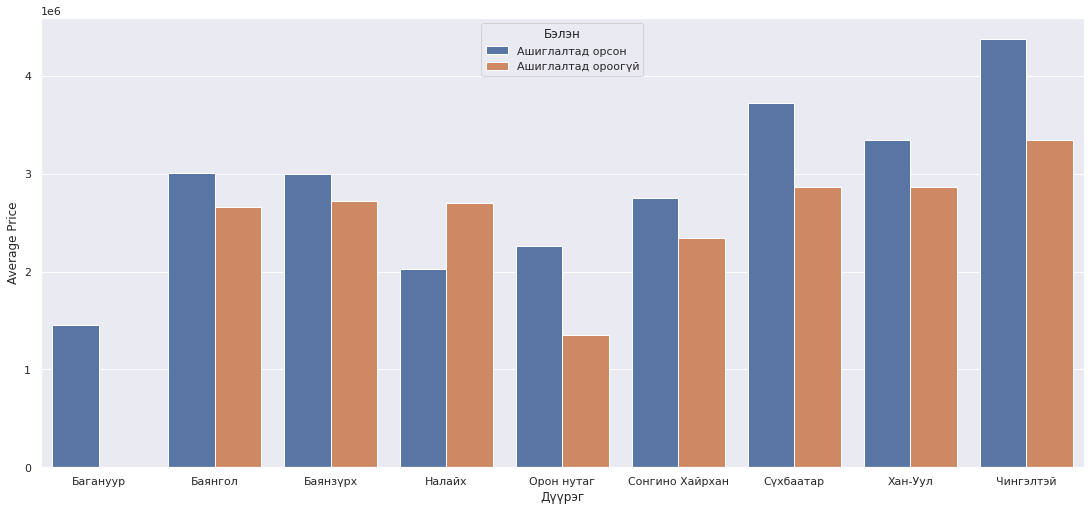

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18.7,8.27)})

sns.barplot(x='Дүүрэг', y='Average Price', hue='Бэлэн', data=avg_prices)


                Бэлэн           avg
0  Ашиглалтад ороогүй  2.603956e+06
1    Ашиглалтад орсон  2.881060e+06


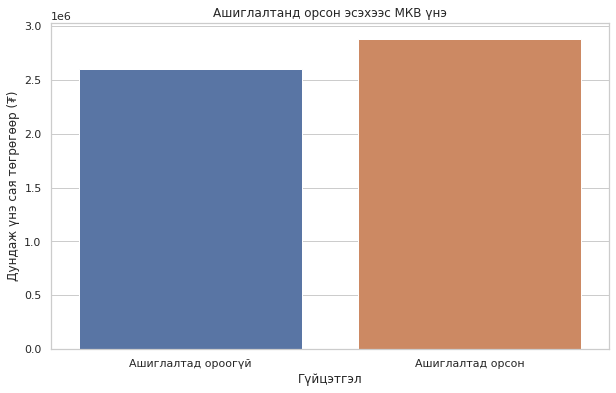

In [10]:
avg_price_for_process=avg_prices.groupby('Бэлэн')['Average Price'].mean().reset_index()
avg_price_for_process = avg_price_for_process.rename(columns={'Average Price': 'avg'})
print(avg_price_for_process)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Бэлэн", y="avg", data=avg_price_for_process)
plt.title("Ашиглалтанд орсон эсэхээс МКВ үнэ")
plt.xlabel("Гүйцэтгэл")
plt.ylabel("Дундаж үнэ сая төгрөгөөр (₮)")
plt.show()

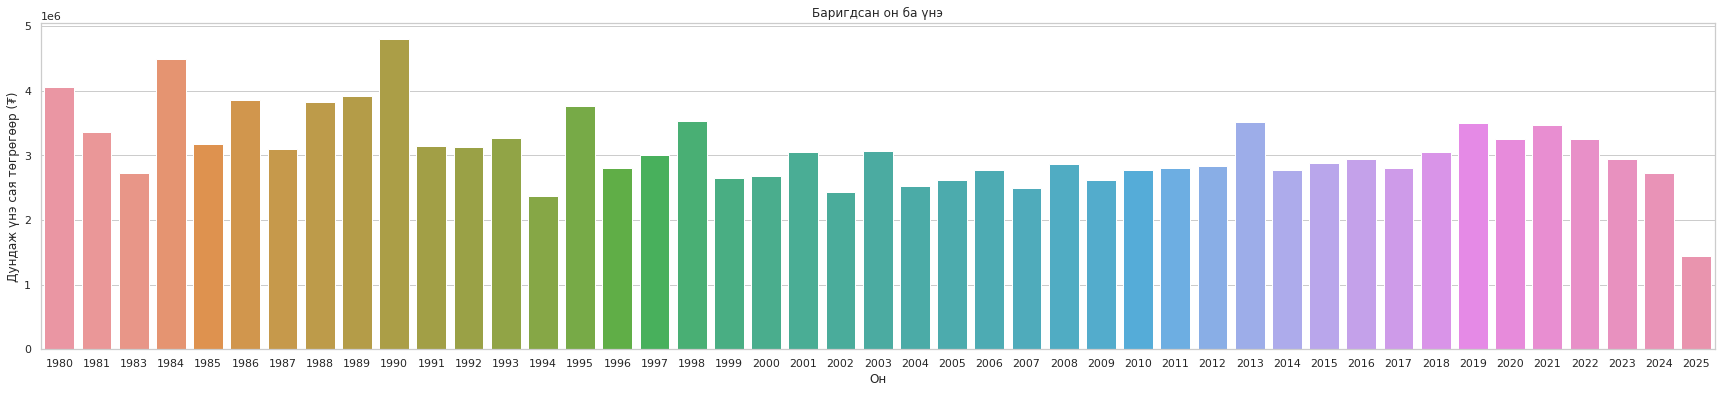

In [22]:
yearly_df = df.groupby([ 'Он'])['Үнэмк'].mean().reset_index()
yearly_df.head()

plt.figure(figsize=(30, 6))
sns.barplot(x="Он", y="Үнэмк", data=yearly_df)
plt.title("Баригдсан он ба үнэ")
plt.xlabel("Он")
plt.ylabel("Дундаж үнэ сая төгрөгөөр (₮)")
plt.show()

,Дүүрэг,Он,Үнэмк
0,Багануур,2025,1.450000e+06
1,Баянгол,1980,3.833581e+06
2,Баянгол,1983,2.727273e+06
3,Баянгол,1984,2.083333e+06
4,Баянгол,1985,2.303448e+06


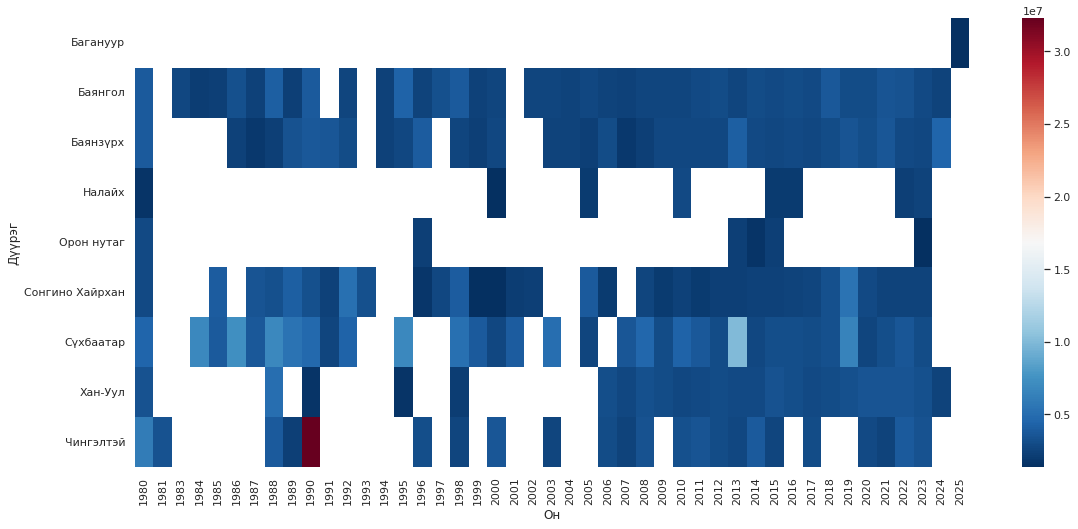

In [28]:
heatmap_df = df.groupby(['Дүүрэг','Он'])['Үнэмк'].mean().reset_index()
sns.heatmap(heatmap_df.pivot(index='Дүүрэг', columns='Он', values='Үнэмк'),cmap='RdBu_r')
heatmap_df.head()